<a href="https://colab.research.google.com/github/sriramrakshtih/Array-1/blob/master/KolarS_DhabadeR_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sriram Rakshith Kolar  | Ramya Dhabhade | Python - Fall 2021 Final Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

"""Loading all libraries into the dataset which are further used in the visualizations below.

Reading the dataset to be used. Trying to print the first few rows of the dataset.
"""

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

Checking for null values

In [6]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
fig = px.histogram(df, x = 'quality')
fig.show()

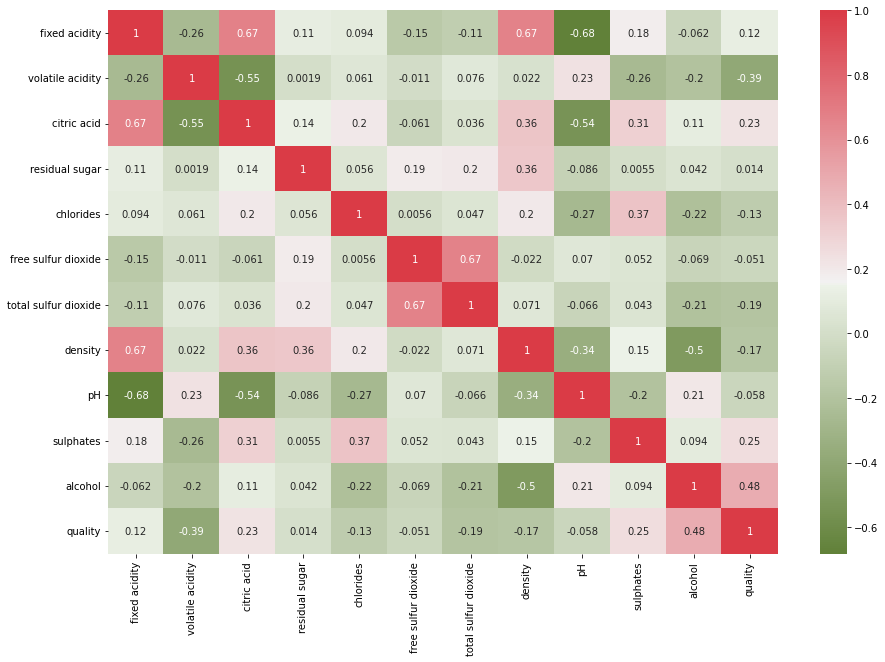

In [8]:
corr = df.corr()
plt.pyplot.subplots(figsize = (15,10))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            cmap = sns.diverging_palette(110, 10, as_cmap=True))

In [9]:
#defining my classification
df['goodQuality'] = [1 if x >= 7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodQuality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [10]:
X = df.drop(['quality', 'goodQuality'], axis = 1)
Y = df['goodQuality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodQuality, Length: 1599, dtype: int64

In [12]:
df['goodQuality'].value_counts()

0    1382
1     217
Name: goodQuality, dtype: int64

In [19]:
from MyPackage import preprocessing
preprocessing.preprocessing(X,Y)

In [22]:
from pandas.core.algorithms import mode
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse.construct import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_features = X
X = StandardScaler().fit_transform(X)
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=.25, random_state = 0)


class Models:
  def __init__(self, XTrain, YTrain, XTest, YTest):
    self.XTrain = XTrain
    self.YTrain = YTrain
    self.XTest = XTest
    self.YTest = YTest

  def decisionTree(self):
    model_1 = DecisionTreeClassifier(random_state=1)
    model_1.fit(XTrain, YTrain)
    y_pred1 = model_1.predict(XTest)

    print(classification_report(YTest, y_pred1))

  def randomForest(self):
    model_2 = RandomForestClassifier(random_state = 1)
    model_2.fit(XTrain, YTrain)
    y_pred2 = model_2.predict(XTest)

    print(classification_report(YTest, y_pred2))


model = Models(XTrain, YTrain, XTest, YTest)




In [24]:
model.decisionTree()

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [25]:
model.randomForest()

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



Feature Importance

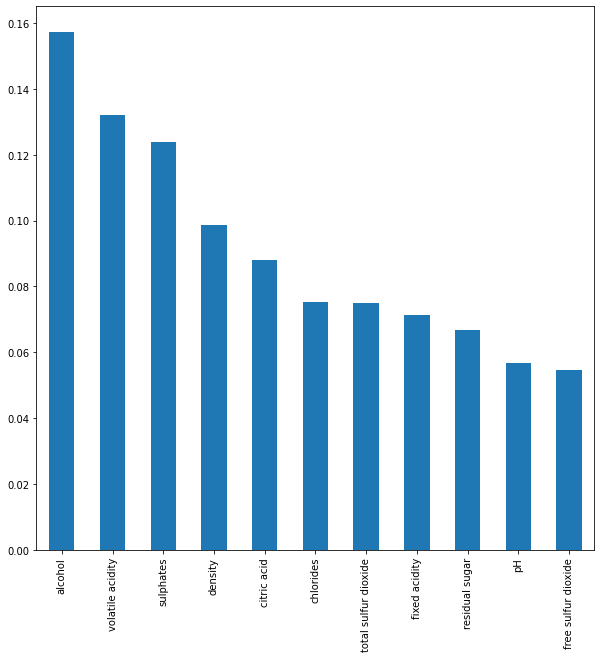

In [19]:
feature_importance = pd.Series(model_2.feature_importances_, index=X_features.columns)
feature_importance.nlargest(25).plot(kind = 'bar', figsize = (10,10))

alcohol, volatile acidity, sulphates are the top 3 features. 

In [20]:
# Good quality wine
df_temp = df[df['goodQuality'] == 1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodQuality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [21]:
# Bad quality wine
df_temp2 = df[df['goodQuality'] == 0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodQuality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0
